
**Used Car Price Prediction Using Machine Learning**


Context

There is a huge demand for used cars in the Indian Market today. As sales of new vehicles have slowed down in the recent past, the pre-owned car market has continued to grow over the past few years and is now more prominent than the new car market. Cars4U is a budding tech start-up that aims to find footholes in this Market. In 2018-19, car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales, which could mean that the demand is shifting towards the pre-owned Market. Some car owners replace their old vehicles with pre-owned cars instead of buying a new automobile. Unlike new cars, where price and supply are relatively deterministic and managed by Original Equipment Manufacturer, the used car market is a very different beast, with significant uncertainties in both pricing and supply. Several factors, including mileage, brand, model, year, Etc., can influence a car's actual worth. From a seller's perspective, it is not an easy task to set the correct price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes vital to growing in the Market.


Objective

Come up with a pricing model that can effectively predict the price of used cars and help the business devise profitable strategies using differential pricing.

The problem formulation:


There are two main goals I want to achieve to resolve this problem.

The first is to estimate the price of used cars by considering all the features based on historical data. 

Second, to better understand the most relevant features that help determine the price of a used car.



Data Information



S.No. : Serial Number

Name : Name of the car which includes Brand name and Model name

Location : The location in which the car is being sold or is available for purchase (Cities)

Year : Manufacturing year of the car

Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.

Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

Transmission : The type of transmission used by the car. (Automatic / Manual)

Owner : Type of ownership

Mileage : The standard mileage offered by the car company in kmpl or km/kg

Engine : The displacement volume of the engine in CC.

Power : The maximum power of the engine in bhp.

Seats : The number of seats in the car.

New_Price : The price of a new car of the same model in INR 100,000

Price : The price of the used car in INR 100,000 (Target Variable)



Potential techniques

I will be using the following types of regression techniques namely Linear Regression , Lasso/Ridge Regression, Decision Tree and Random Forest.

 Linear regression
 
It is the simplest regression technique used for predictive analysis, a linear approach for featuring the relationship between the response and predictors or descriptive variables. It mainly considers the conditional probability distribution of the response presents the predictor’s uses.

Lasso/Ridge Regression

The “LASSO” stands for Least Absolute Shrinkage and Selection Operator. Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination

Decision Tree

A decision Tree is a supervised machine learning technique that builds regression or classification models. It uses a tree-like structure where the leaf nodes are the outcomes. All the other nodes except the leaf nodes are called decision nodes, where further splits are made depending on yes/no questions. The goal of the decision tree is to create a model that can be used to predict the value of the target variable by learning simple decision rules from the previous data. 


Random Forest

The random forest is a classification algorithm consisting of many decision trees. It uses bagging and feature randomness when building each tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.





Loading libraries

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries to build linear model for statistical analysis and prediction
#import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor

from sklearn.model_selection import train_test_split

#Metrics to evaluate the model
from sklearn import metrics

#for tuning the model
from sklearn.model_selection import GridSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)


Load the data

In [ ]:
data = pd.read_csv("/used_cars.csv")


Understand the data by observing a few rows

In [ ]:
data.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [ ]:
data.tail(5).describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,0.0,0.0
mean,7250.000000,2013.000000,60223.200000,17.606000,1520.200000,108.780000,5.0,NaN,NaN
std,1.581139,1.581139,22937.211703,4.917975,391.346011,38.454675,0.0,NaN,NaN
min,7248.000000,2011.000000,28000.000000,10.000000,1197.000000,63.100000,5.0,NaN,NaN
25%,7249.000000,2012.000000,52262.000000,17.200000,1197.000000,103.600000,5.0,NaN,NaN
50%,7250.000000,2013.000000,59000.000000,17.210000,1461.000000,103.600000,5.0,NaN,NaN
75%,7251.000000,2014.000000,72443.000000,20.540000,1598.000000,103.600000,5.0,NaN,NaN
max,7252.000000,2015.000000,89411.000000,23.080000,2148.000000,170.000000,5.0,NaN,NaN


**Observations and Insights: There are 13 columns with numeric and categorical data. 13 different dimensions of an individual car for example Name, Kilometers_Driven and Fuel_Type

**

Let us check the data types and missing values of each column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


** Observations: The variables consist of intergers ,objects and float data types.

The  datasets have 7253 number of observations and 14 columns


In [ ]:
# Check total number of missing values of each column. We Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64




Observations and Insights: The majority of the New_Price column are missing 6257/7253 and Price 1234/7253. There are a small number within the Power (175), Seats(53), and Engine(46)

We can observe that S.No. has no null values. Also the number of unique values are equal to the number of observations. So, S.No. looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence it can be dropped.


In [ ]:
data.shape

(7253, 14)

In [ ]:
data.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price'],
      dtype='object')

In [ ]:
# Remove S.No. column from data. Use inplace = True
data.drop(columns=['S.No.'], inplace=True)



Exploratory Data Analysis

Let us now explore the summary statistics of numerical variables

In [ ]:
# Explore basic summary statistics of numeric variables by using  describe() method.
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**

Observations and Insights: We have data for most of the data for all columns with the exception of New_price and Price. We see a lot of variance in the Engine, Power, feature which appears to have outliers on both sides of the range. New_Price and Price also have some large outliers on the right side of the range. Seats has the majority of its data reflecting an arrangenment of five seats

**



Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category


In [ ]:
# Explore basic summary statistics of categorical variables. Use the argument include=['object'] 
data.describe(include=object)

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,7253,7253,7253,7253,7253
unique,2041,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,55,949,3852,5204,5952



Number of unique observations in each category


In [ ]:
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].unique)
    print('-'*50)

For column: Name
<bound method Series.unique of 0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7253, dtype: object>
--------------------------------------------------
For column: Location
<bound method Series.unique of 0           Mumbai
1             Pune
2          Chennai
3          Chennai
4       Coimbatore
           ...    
7248     Hyderabad
7249        Mumbai
7250       Kolkata



Observations and Insights: _

We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven?
   
 Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

Let us  explore the two points mentioned above

Check Kilometers_Driven extreme values


In [ ]:
#Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(by=['Kilometers_Driven'],ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00




Observations and Insights: _

In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.


In [ ]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(data.index[2328], inplace=True)


Check Mileage extreme values


In [ ]:
#Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values(by=['Mileage'],ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54,998.0,67.04,5.0,5.35,3.25
2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54,998.0,67.04,5.0,5.54,3.90
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54,998.0,67.04,5.0,5.58,3.05
4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54,998.0,67.04,5.0,5.58,2.85
1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54,998.0,67.04,5.0,5.54,2.96
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44,796.0,40.30,4.0,NaN,3.00
3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.44,796.0,40.30,4.0,NaN,2.10
1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44,796.0,40.30,4.0,NaN,3.50
4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,2017,24310,CNG,Manual,First,33.44,796.0,40.30,4.0,NaN,3.70
6788,Maruti Alto K10 LXI CNG Optional,Delhi,2017,33000,CNG,Manual,First,32.26,998.0,58.20,4.0,4.66,NaN




Observations**

Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part

**





Univariate Analysis

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.




1. Univariate Analysis - Numerical Data

Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.


In [ ]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram


Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.


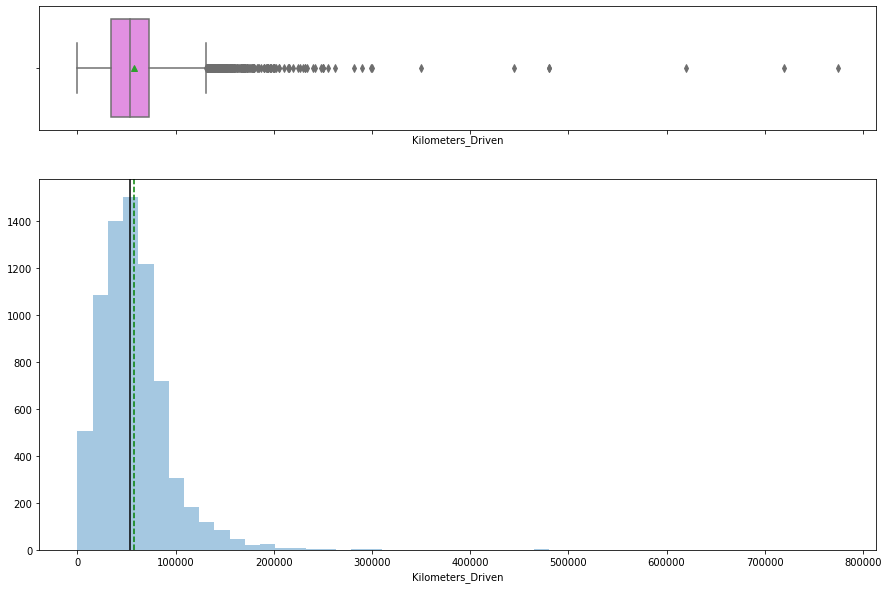

In [ ]:
#Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**
Observation : Kilometers_Driven is highly right-skewed. We can use Log transformation of the feature to reduce/remove the skewness.
**

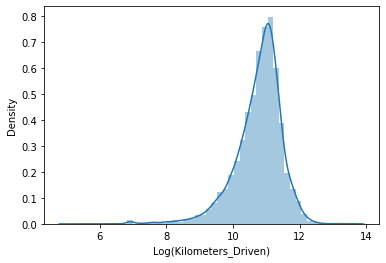

In [ ]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");


Observations and Insights: Now close to normal distribution


In [ ]:
### We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])


Note: Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as 'price_log'


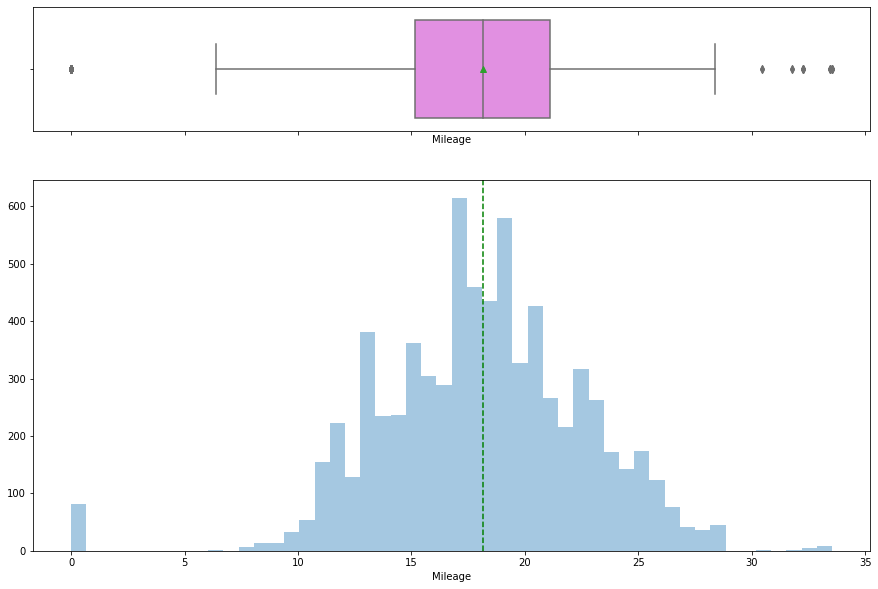

In [ ]:
# Box plot and Histogram for Mileage
histogram_boxplot(data['Mileage'])

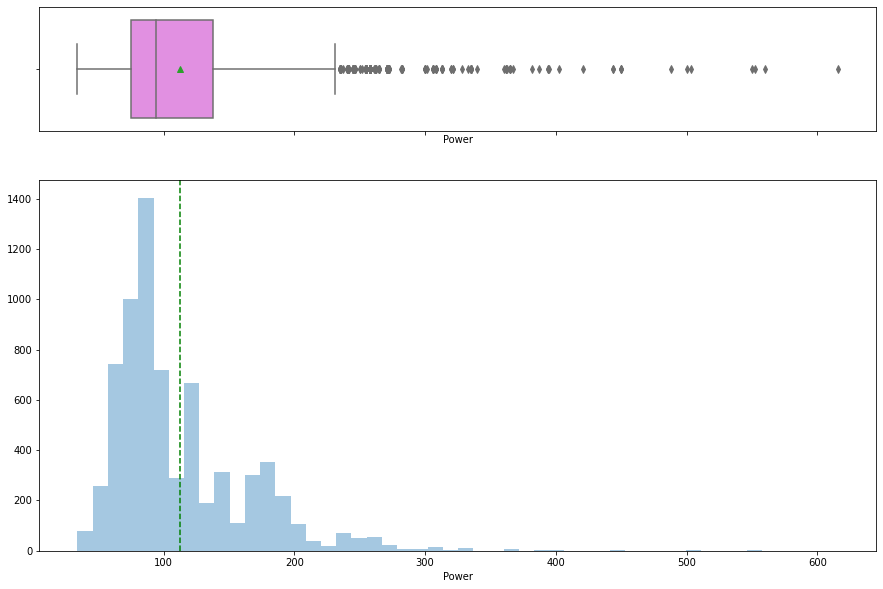

In [ ]:

histogram_boxplot(data['Power'])


Observation

Most cars have Power of engines between 90-100 bhp.

From the boxplot, we can see that there are many outliers in this variable - cars with more than 250 bhp are being considered as outliers in data.


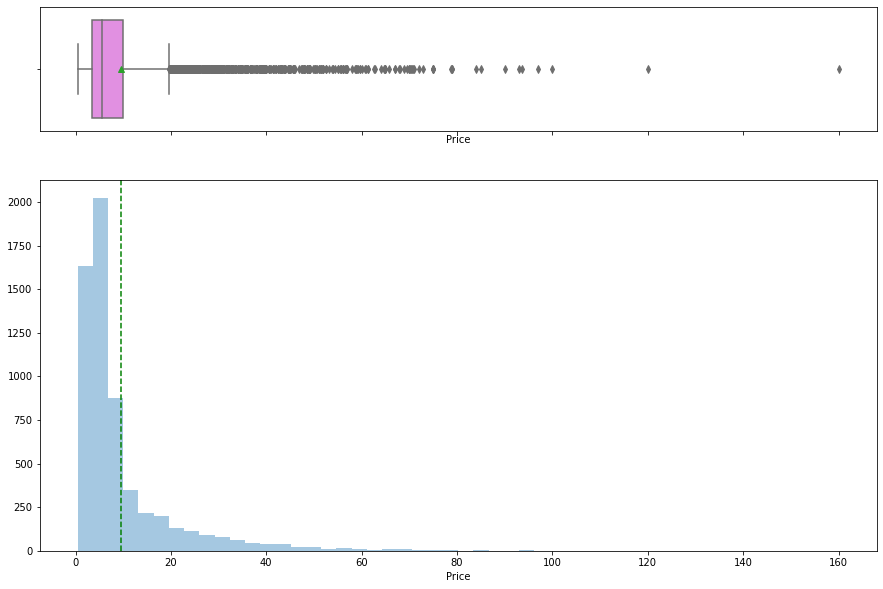

In [ ]:
# Box plot and Histogram for Price
histogram_boxplot(data['Price'])



Observations and Insights for all the plots:

The Price distribution is highly skewed,it can be normalized with log transformation.

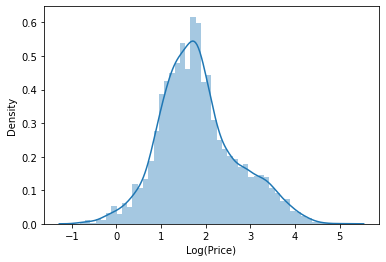

In [ ]:
sns.distplot(np.log(data["Price"]), axlabel="Log(Price)");

Observations

Distribution has been normalized with Log transformation 

Still have a few extreme price values in summary statistics




2. Univariate analysis - Categorical Data


In [ ]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    
    plt.show() # show the plot


Let us plot a barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.


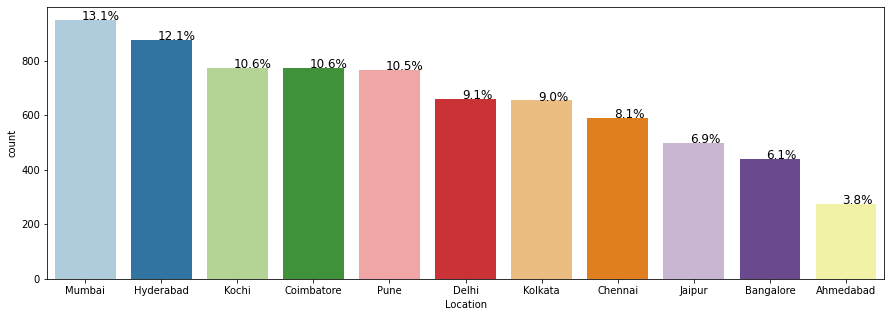

In [ ]:
#Bar Plot for 'Location'
perc_on_bar('Location')



 Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`

Observations and Insights from all plots:
Mumbai has the highest percentage of cars -13.1% followed by Hyderabad and the least is in Ahmedabad with only 3.8% _

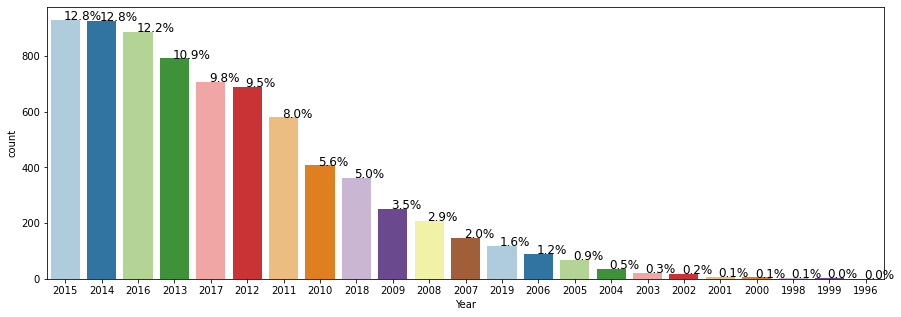

In [ ]:
#Barplot for Year
perc_on_bar('Year')

Observation

Amost 40% car dataset are from the period 2014 to 2016

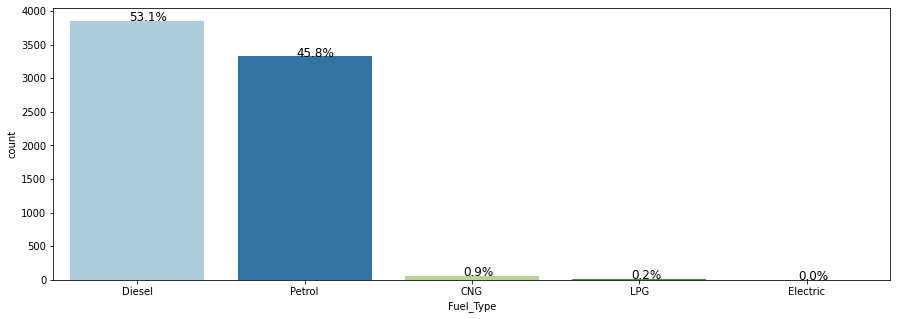

In [ ]:
#Barplot for Fuel_Type
perc_on_bar('Fuel_Type')

Observation

About 99% of the cars run on Diesel(53.1%) and Petrol(45.8)

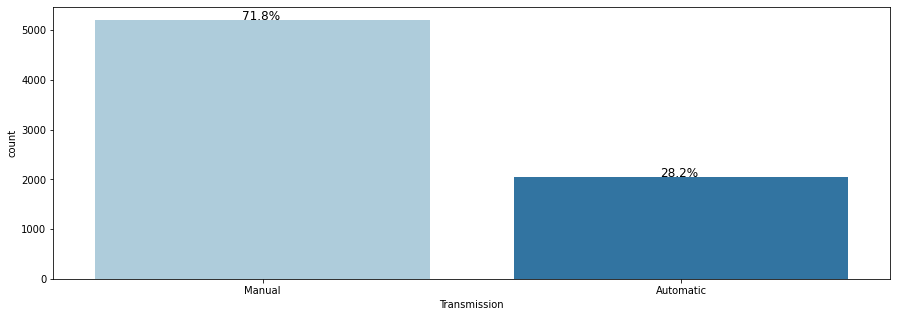

In [ ]:
#Barplot for Transmission
perc_on_bar('Transmission')

Observation

About 72% have manual transmission and 20% of the rest  have automatic transmission

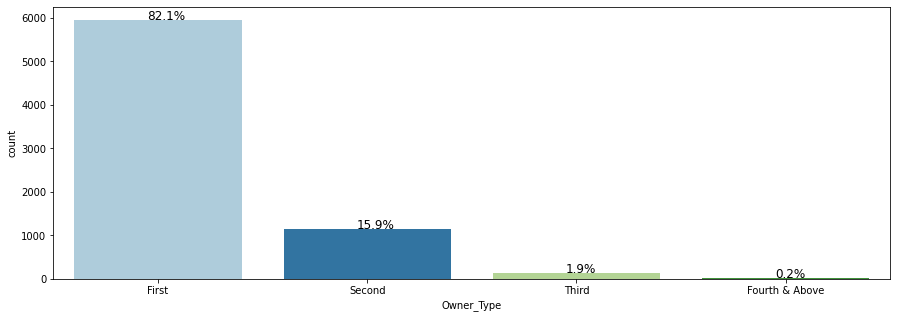

In [ ]:
#Barplot for Owner_Type
perc_on_bar('Owner_Type')

Observation

About 82% are first time owners



Bivariate Analysis

1. Pair plot

A pairs plot allows us to see both distribution of single variables and relationships between two variables


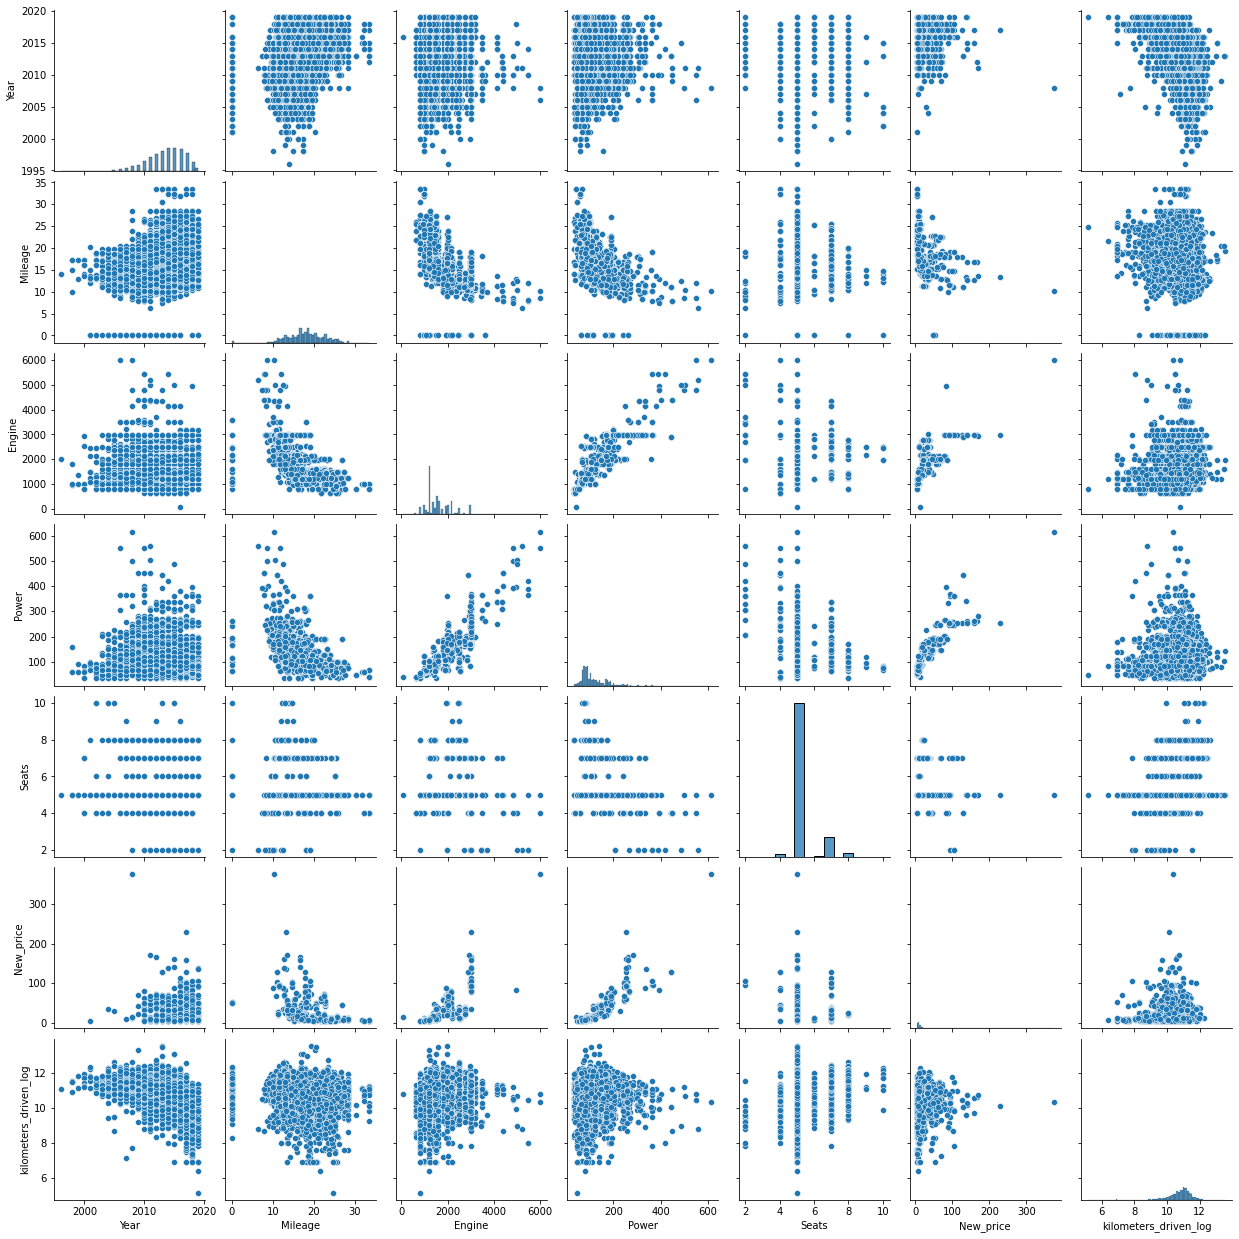

In [ ]:
#We can include the log transformation values and drop the original skewed data columns
sns.pairplot(data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()


Observations-

Kilometers Driven have no relationship with price.

Price has a positive relationship with Year. Newer the cars cost more.
    
There seem to be some relationship between Mileage and the  price of used cars.

Positive relationship between Engine displacement and Power 

The prices of New and Used Car Prices are also positively correlated

Mileage has a negative correlation with engine displacement and power.

More fuel seems to be consumed by cars with large and more powerrful engine.





2. Heat map

Heat map shows a 2D correlation matrix between two discrete features


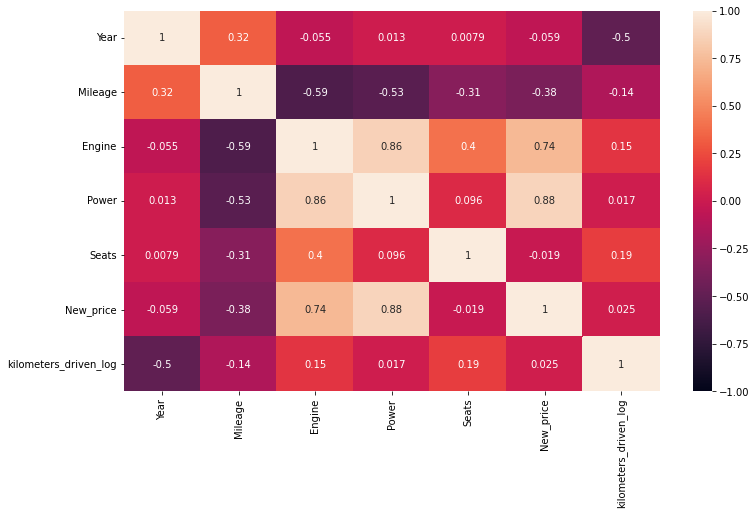

In [ ]:
#We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Price','Kilometers_Driven'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()


Observations and Insights: 
Power and New_price has a very high positive correlation of .88

Power and Engine also has a positive correlation ,Power and Price _log also has a positive correlation 

Seats and New_price have a negative correlation



3. Box plot


In [ ]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()


Let us now plot bivariate analysis of target variable with a categorical variable 'Location'


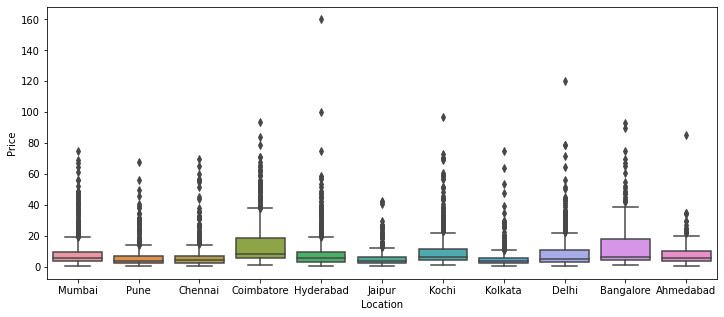

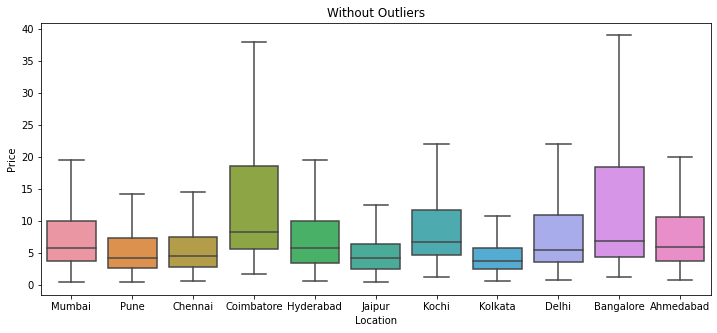

In [ ]:
#Box Plot:Price vs Location
boxplot(data['Location'])

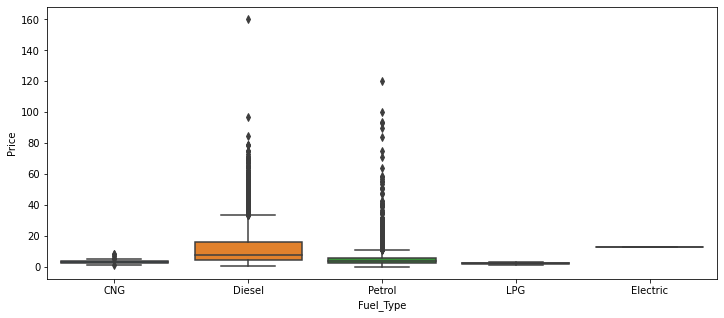

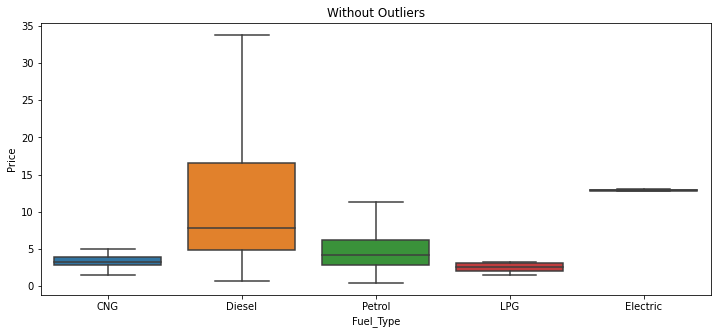

In [ ]:
#Box Plot:Price vs Location
boxplot(data['Fuel_Type'])

Observations

Interestingly, diesel cars generally are the most cosly

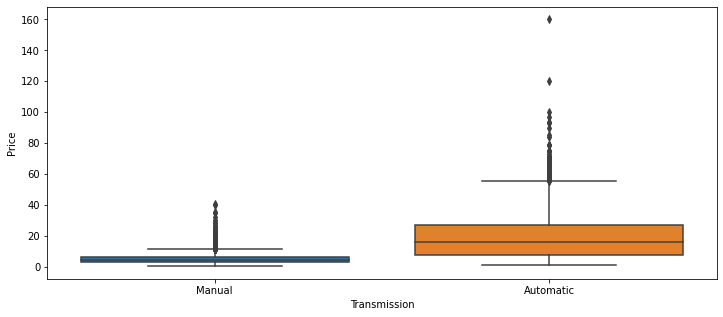

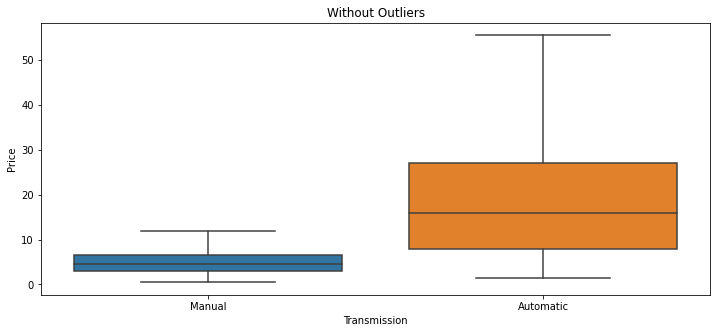

In [ ]:
#Box Plot:Price vs Transmission
boxplot(data['Transmission'])

Observations

Modern cars with automatic transmissions are more costly

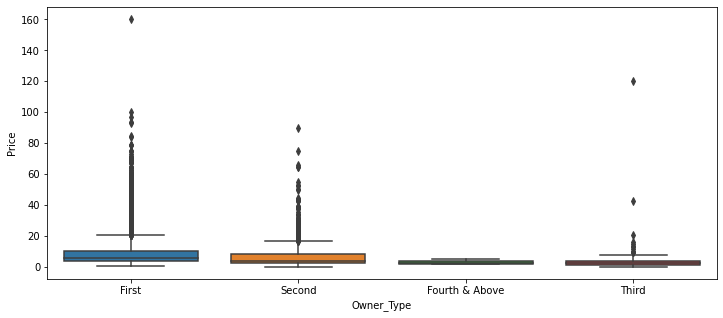

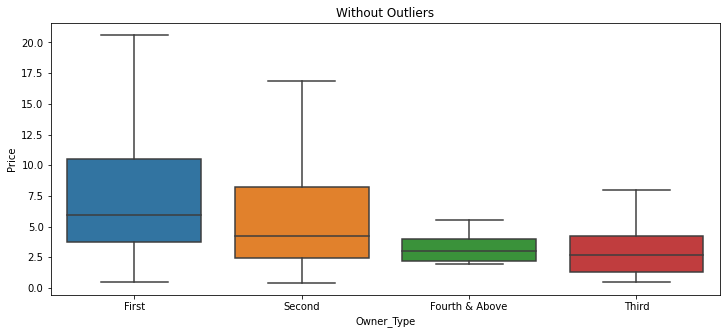

In [ ]:
#Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.
boxplot(data['Owner_Type'])



Observations and Insights for all plots**

Prices for cars with first-time owners are much higher than those with third-time owners.

 **



Feature engineering

Note: The Name column in the current format might not be beneficial in our analysis. Since the name contains both the brand name and the vehicle's model name, the column would have too many unique values to be helpful in prediction. We can extract that information from that column.

In [ ]:
data["Name"].nunique()

2041

Observation

With 2041 unique names, car names will not be great predictors of the price in our current data. But we can process this column to extract meaningful information, for example, brand name.

In [ ]:
#Car Brand Name
# Extract Brand Names
data["Brand"] = data["Name"].apply(lambda x: x.split(" ")[0].lower())

# Check the data
data["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               311
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
opelcorsa           1
lamborghini         1
ambassador          1
hindustan           1
smart               1
Name: Brand, dtype: int64

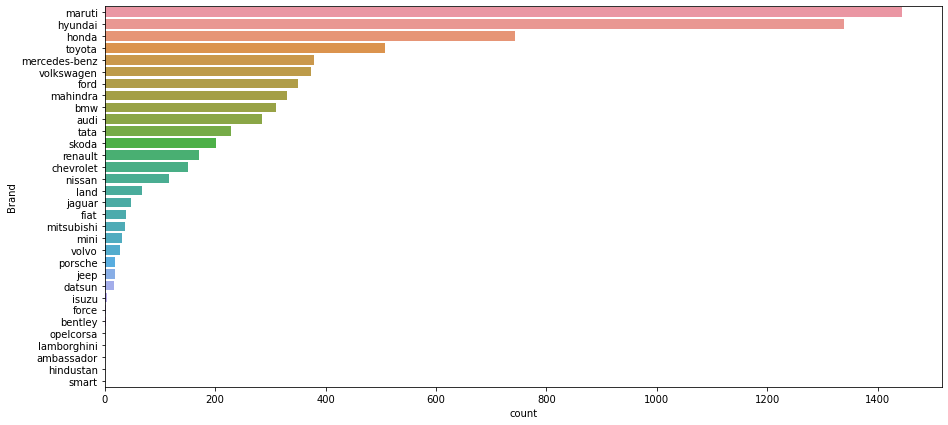

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Brand", data=data, order=data["Brand"].value_counts().index)
plt.show()


Observations

The Most brands are Maruti and Hyundai.

In [ ]:
# Extract Model Names
data["Model"] = data["Name"].apply(lambda x: x.split(" ")[1].lower())

# Check the data
data["Model"].value_counts()



swift         418
city          318
i20           303
innova        203
verna         200
             ... 
redi            1
mux             1
beetle          1
1.4gsi          1
countryman      1
Name: Model, Length: 218, dtype: int64

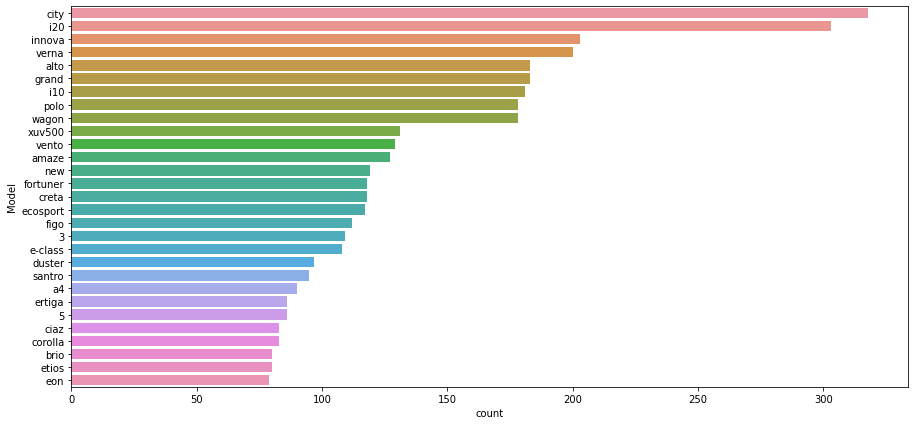

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Model", data=data, order=data["Model"].value_counts().index[1:30]);

Observation

We have both luxury and modest brands of cars in the dataset 

In [ ]:
data.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.093684
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

Observation

We do have lamborghini  as the most expensive car and ambassador as the least expensive car

We also have 2 missing data 

In [ ]:
#work on missing data
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Brand                       0
Model                       0
dtype: int64

Observations

Engine displacement information of 46 observations is missing and a maximum power of 175 entries is missing.
    
Information about the number of seats that is not available is 53 entries.

New Price as we saw earlier has 6246 missing.

Price is also missing  1234 entries


In [ ]:
#Missing values in Seats
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,11.002200,honda,city
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,10.645449,maruti,swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,3.60,11.162460,ford,figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,11.490680,maruti,swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50,10.915107,land,rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,10.915179,honda,city
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,10.825661,maruti,swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50,11.652687,honda,city
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,11.142992,land,rover
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,1.70,11.385092,honda,city


In [ ]:
# We'll impute these missing values one by one, by taking median number of seats for the particular car,
# using the Brand and Model name
data.groupby(["Brand", "Model"], as_index=False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


In [ ]:
# Impute missing Seats
data["Seats"] = data.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.median()))

In [ ]:
data['Seats'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7248    False
7249    False
7250    False
7251    False
7252    False
Name: Seats, Length: 7252, dtype: bool

In [ ]:
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Brand,Model
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,10.933107,maruti,estilo
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2.50,10.596635,maruti,estilo
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.75,10.839581,maruti,estilo


In [ ]:
# Maruti Estilo can accomodate 5
data["Seats"] = data["Seats"].fillna(5.0)

In [ ]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
Brand                       0
Model                       0
dtype: int64

In [ ]:
#Missing values for Mileage
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,10.819778,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,10.691945,toyota,prius


In [ ]:
data[data['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,10.819778,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,10.691945,toyota,prius


Observations

2 Electric cars with no entries for Mileage.


In [ ]:
# Impute missing Mileage
data["Mileage"].fillna(data['Mileage'].median(),inplace=True)

In [ ]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
Brand                       0
Model                       0
dtype: int64

In [ ]:
# Impute missing Engine
data["Engine"].fillna(data['Engine'].median(),inplace=True)

In [ ]:
#Missing values for Power
# Impute missing Power
data["Power"].fillna(data['Power'].median(),inplace=True)

In [ ]:
# Impute missing New_price
data["New_price"].fillna(data['New_price'].median(),inplace=True)

In [ ]:
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1234
kilometers_driven_log       0
Brand                       0
Model                       0
dtype: int64

In [ ]:
# Drop the rows where 'Price' == NaN
cars_data = data[data["Price"].notna()]

In [ ]:
cars_data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
Brand                    0
Model                    0
dtype: int64

Observation

All missing values have been taken care of (treated)



Split Data

In [ ]:
cars_data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_price', 'Price', 'kilometers_driven_log', 'Brand', 'Model'],
      dtype='object')

In [ ]:
cars_data["kilometers_driven_log"] = np.log(cars_data["Kilometers_Driven"])
cars_data["price_log"] = np.log(cars_data["Price"])

cars_data.dropna(subset=["price_log"])

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Brand,Model,price_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,11.57,1.75,11.184421,maruti,wagon,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.57,12.50,10.621327,hyundai,creta,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,honda,jazz,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.57,6.00,11.373663,maruti,ertiga,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,11.57,17.74,10.613246,audi,a4,2.875822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75,10.217020,maruti,swift,1.558145
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,11.57,4.00,11.512925,hyundai,xcent,1.386294
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,11.57,2.90,10.915088,mahindra,xylo,1.064711
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,11.57,2.65,10.736397,maruti,wagon,0.974560


In [ ]:
X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = cars_data[["price_log", "Price"]]

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(4212, 264) (1806, 264)


In [ ]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
#the categorical column as the input and returns the boxplots and histograms for the variable.

def get_model_score(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train['Price'],pred_train_)
    test_r2=metrics.r2_score(y_test['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_train['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_test['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_test['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list


For Regression Problems,the algorithms used are :

1) Linear Regression

2) Ridge / Lasso Regression

3) Decision Trees

4) Random Forest

**Fitting a linear model**


Linear Regression can be implemented using:

1) Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

2) Statsmodels: https://www.statsmodels.org/stable/regression.html


In [ ]:
# import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a linear regression model
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train['price_log'])

LinearRegression()

In [ ]:
# Get score of the model.
LR_score = get_model_score(lr)

R-sqaure on training set :  0.9399395114403349
R-square on test set :  0.8687919879680566
RMSE on training set :  2.738077260682623
RMSE on test set :  4.037008046078894


Observation

Linear regression performs well on both training and test dataset

**Important variables of Linear Regression**

**Building a model using statsmodels**

In [ ]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(X_train)
# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     406.7
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        19:32:01   Log-Likelihood:                 1322.4
No. Observations:                4212   AIC:                            -2187.
Df Residuals:                    3983   BIC:                            -733.7
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns=['coef'])
olsmod['pval']=olsmodel1.pvalues

In [ ]:
# FIlter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by="pval", ascending=False)
pval_filter = olsmod['pval']<=0.05
olsmod[pval_filter]

,coef,pval
Model_mustang,3.554581e-01,0.044779
Model_s-class,-2.256270e-01,0.044480
Model_platinum,-1.755072e-16,0.037365
Model_getz,-2.909346e-01,0.032964
Model_accent,-2.959260e-01,0.027946
...,...,...
Brand_mahindra,-8.492663e+00,0.000000
Brand_maruti,-8.604440e+00,0.000000
Brand_mercedes-benz,-7.370729e+00,0.000000
Brand_mini,-5.927624e+00,0.000000


In [ ]:
# we are looking are overall significant varaible
pval_filter = olsmod['pval']<=0.05
imp_vars = olsmod[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'New_price', 'Location', 'Fuel_Type', 'Engine', 'Owner_Type', 'Power', 'Transmission', 'kilometers_driven_log', 'Brand', 'Year']


Build Ridge / Lasso Regression similar to Linear Regression:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


In [ ]:
# import Ridge/ Lasso Regression from sklearn
#Create a Ridge regression model
rdg = Ridge()

In [ ]:
# Fit Ridge regression model.
rdg.fit(X_train,y_train['price_log'])

Ridge()

In [ ]:
# Get score of the model.
Ridge_score = get_model_score(rdg)

R-sqaure on training set :  0.9305807358112582
R-square on test set :  0.8942380905337258
RMSE on training set :  2.9436845687296755
RMSE on test set :  3.624466406617161


Observation

Ridge regression is able to generalize very well compared to Linear Regression.The main difference  between the 2 is the RMSE on test set.Linear regression is just a little higher ridge regression.


Decision Tree

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html


In [ ]:
# import Decision tree for Regression from sklearn
dtree = DecisionTreeRegressor(random_state=1)

In [ ]:
# Fit decision tree regression model.
dtree.fit(X_train,y_train['price_log'])

DecisionTreeRegressor(random_state=1)

In [ ]:
# Get score of the model.
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.9999965696959587
R-square on test set :  0.8017677653029025
RMSE on training set :  0.020692719736775493
RMSE on test set :  4.962112150644958


Observations

Decision Tree does overfit on the training dataset but does well on test set.Hence it can not generalize well on the test set.


Print the importance of features in the tree building ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

In [ ]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.607232
Year                   0.231208
Engine                 0.045263
Mileage                0.016297
kilometers_driven_log  0.015283
...                         ...
Model_redi             0.000000
Model_a7               0.000000
Model_r-class          0.000000
Model_quanto           0.000000
Model_c-class          0.000000

[264 rows x 1 columns]


Observation

Main features/variables that influeces price are Power, Year and Engine 


Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
# import Randomforest for Regression from sklearn
# Create a Randomforest regression model 
rf = RandomForestRegressor(random_state=1,oob_score=True)

In [ ]:
# Fit Randomforest regression model.
rf.fit(X_train,y_train['price_log'])

RandomForestRegressor(oob_score=True, random_state=1)

In [ ]:
# Get score of the model.
RandomForest_model = get_model_score(rf)

R-sqaure on training set :  0.9776109183663559
R-square on test set :  0.85097955298771
RMSE on training set :  1.6717425948300626
RMSE on test set :  4.302316619605287


Observations and insights:

Random Forest model performs well on both train and train dataset

Feature Importance

In [ ]:
# Print important features similar to decision trees
print(pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.610177
Year                   0.231769
Engine                 0.037293
kilometers_driven_log  0.017662
Mileage                0.014242
...                         ...
Model_boxster          0.000000
Model_beetle           0.000000
Model_e                0.000000
Model_wr-v             0.000000
Model_a7               0.000000

[264 rows x 1 columns]


Observation

The main features/variables that influence price are Power and Year 

Hyperparameter Tuning: Decision Tree

In [ ]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,25,5)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7],
              'max_leaf_nodes' : [2, 5, 7] + [None],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(max_depth=12, random_state=1)

In [ ]:
# Get score of the dtree_tuned
dtree_tuned_score = get_model_score(dtree_tuned)

R-sqaure on training set :  0.9863758151303819
R-square on test set :  0.7990789902195046
RMSE on training set :  1.3040868997655497
RMSE on test set :  4.995651261569413


Observations and insights:

Performs better after the tuning but still shows some overfitting

Feature Importance

In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.617261
Year                   0.235193
Engine                 0.044433
Mileage                0.014604
kilometers_driven_log  0.010694
...                         ...
Model_grande           0.000000
Model_hexa             0.000000
Brand_smart            0.000000
Model_indigo           0.000000
Model_zest             0.000000

[264 rows x 1 columns]



Observation

The main features/variables influencing pricing  are Power and  Year .


Hyperparameter Tuning: Random Forest

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1,oob_score=True)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {  
                'max_depth':[5,7,None],
                'max_features': ['sqrt','log2'],
                'n_estimators': [250,500,800,900]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train['price_log'])

RandomForestRegressor(max_features='sqrt', n_estimators=900, oob_score=True,
                      random_state=1)

In [ ]:
# Get score of the model.
rf_tuned_score=get_model_score(rf_tuned)

R-sqaure on training set :  0.9689916685185882
R-square on test set :  0.8628372357710008
RMSE on training set :  1.967390034542909
RMSE on test set :  4.127599504962563



Observations and insights: 

The model is a little better after the tuning

Feature Importance

In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                          Imp
Power                0.176376
Engine               0.135576
Year                 0.108754
Transmission_Manual  0.089957
Mileage              0.046353
...                       ...
Model_wr-v           0.000000
Model_boxster        0.000000
Model_cedia          0.000000
Model_1000           0.000000
Model_a7             0.000000

[264 rows x 1 columns]


Observations

There are 3 main features/variables that affect pricing namely Power, Year and Engine 


In [ ]:
# defining list of models
models = [lr,rdg,dtree, dtree_tuned, rf, rf_tuned]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Ridge Regression','Decision Tree','Tuned Decision Tree','Random Forest',
                                          'Tuned Random Forest'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.939940,0.868792,2.738077,4.037008
1,Ridge Regression,0.930581,0.894238,2.943685,3.624466
2,Decision Tree,0.999997,0.801768,0.020693,4.962112
3,Tuned Decision Tree,0.986376,0.799079,1.304087,4.995651
4,Random Forest,0.977611,0.850980,1.671743,4.302317
5,Tuned Random Forest,0.968992,0.862837,1.967390,4.127600


Observations:

Ridge Regression and Linear Regression performs well. Ridge Regression however offers a more generalized model for both train and test dataset

Some more tuning can be performed on Random forest to improve the model



Insights/general observation
Refined insights:

The performances of the models can be increased by hyper-parameter tuning.

Mileage is inversely correlated with Price. Generally, high mileage cars are the lower budget cars.



Extracting car model name

It made it possible to differentiate among the cars in power, cost, petrol, diesel and transmission type, and cost.

Important variables with Linear Regression:

The list of variables that make the most impact on pricing when using  Linear regression  are:

    Year
    Power
    New_price
    Location
    Kilometers_Driven
    Fuel_Type
    Owner_Type
    Transmission


Comparison of various techniques and their relative performance:



    


####**Key recommendations**: 
     
The focus should be placed more on selling newer cars. Newer cars sell for higher prices.

More attention should also be given to cars with minor ownership like 1 and 2. Prices turn to drop from 3owners and more

More investment should be directed towards cars with Automatic Transmission because they are more costly and Morden.

It might be economically wise to invest in the southern markets, looking at trends like higher prices and market growth.

Try using other models like XGB Regression and Facebook Prophet to see how they perform.

With Increasing petrol rates, diesel cars have been in more demand in recent years, acquiring and selling them can high profits.

Based on Analysis, we can divide our cars into three segments Low, Medium, and High budget. This will help plan different sales strategies for each part.
